In [1]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
TRACK_NAME = "reInvent2019_track"
waypoints = np.load("./%s.npy" % TRACK_NAME)

In [3]:
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

In [4]:
for x in range(0,155):
    print(str(x)+" : ")
    print(center_line[x])

0 : 
[0.307878   2.83060753]
1 : 
[0.32365686 2.68032849]
2 : 
[0.34496535 2.53074002]
3 : 
[0.37292039 2.38224852]
4 : 
[0.40683891 2.23500252]
5 : 
[0.44602525 2.08906847]
6 : 
[0.49285656 1.94542652]
7 : 
[0.55045813 1.80576599]
8 : 
[0.61999089 1.67165703]
9 : 
[0.70202522 1.54481751]
10 : 
[0.79915337 1.42926097]
11 : 
[0.91470039 1.33219576]
12 : 
[1.04656261 1.25887662]
13 : 
[1.19022501 1.21275359]
14 : 
[1.33994699 1.19373798]
15 : 
[1.49100804 1.19498184]
16 : 
[1.64160848 1.20709264]
17 : 
[1.79134101 1.22735822]
18 : 
[1.94048601 1.25164664]
19 : 
[2.08953357 1.27651089]
20 : 
[2.23866951 1.3008531 ]
21 : 
[2.38798451 1.32407165]
22 : 
[2.53842556 1.33726159]
23 : 
[2.68942499 1.33341277]
24 : 
[2.83894849 1.31250498]
25 : 
[2.98254693 1.26607651]
26 : 
[3.11551106 1.19464037]
27 : 
[3.23526204 1.10267687]
28 : 
[3.34111154 0.99496675]
29 : 
[3.43600547 0.87740791]
30 : 
[3.52554893 0.75568691]
31 : 
[3.62269449 0.64002268]
32 : 
[3.73149562 0.53524975]
33 : 
[3.85095036 0.

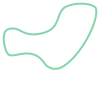

In [5]:
l_inner_border

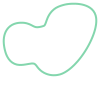

In [6]:
l_outer_border

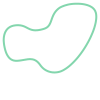

In [7]:
l_center_line

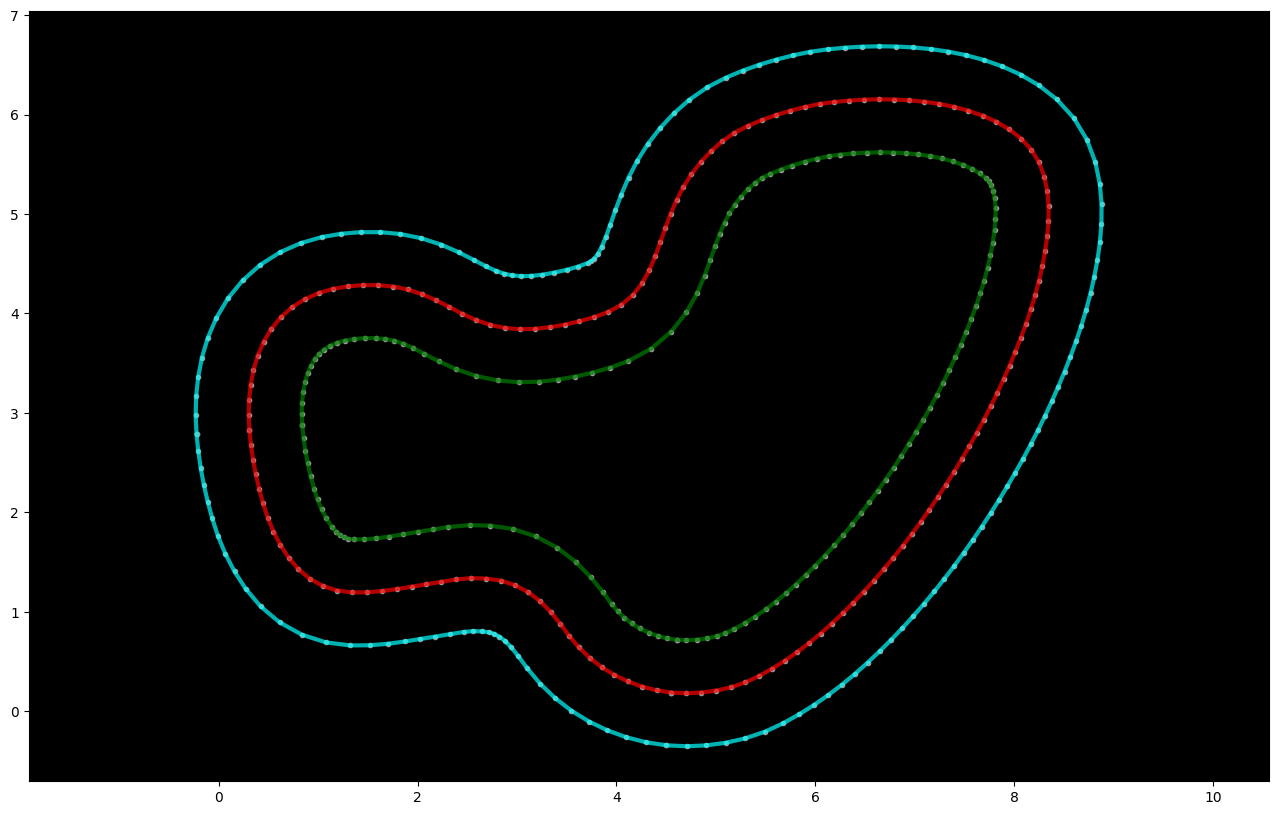

In [71]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob, _color):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color=_color, alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'red')                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'green')                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'cyan')     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

In [72]:
center_line.size
center_line.shape


(155, 2)

In [80]:
perpendicular_slope = []
length = center_line.shape[0]

def slope_division(n, d, x):
    if n == 0 and d == 0 and len(perpendicular_slope) >= (x-1)%length:
        return -1 * (1/perpendicular_slope[(x-1)%length])
    return n / d if d else None

for x in range(0,length):
    a = center_line[x]
    b = center_line[(x+1)%length]
    slope = slope_division((b[1] - a[1]),(b[0] - a[0]), x)
#     slope = ((a[1] - b[1])/(a[0] - b[0]))
    print("Slope for " + str(x) + " : " + str(slope))
    
    if slope is None:
        perpendicular_slope.append(0)
#         continue
    elif slope == 0:
        perpendicular_slope.append(None)
#         continue
    else:
        perpendicular_slope.append(-1*(1/slope))
    
    print("Perpendicular Slope for " + str(x) + " : " + str(perpendicular_slope[x]))
    

Slope for 0 : -9.524078266051312
Perpendicular Slope for 0 : 0.10499703720038837
Slope for 1 : -7.02013477730765
Perpendicular Slope for 1 : 0.14244740759571548
Slope for 2 : -5.3117956708083
Perpendicular Slope for 2 : 0.18826025358912749
Slope for 3 : -4.34116846329347
Perpendicular Slope for 3 : 0.23035272840836502
Slope for 4 : -3.7241053856630124
Perpendicular Slope for 4 : 0.26852086513173884
Slope for 5 : -3.0672201241647055
Perpendicular Slope for 5 : 0.3260281165090261
Slope for 6 : -2.4245963054579156
Perpendicular Slope for 6 : 0.41243979368810324
Slope for 7 : -1.9287160073420606
Perpendicular Slope for 7 : 0.5184796497738864
Slope for 8 : -1.546176131953058
Perpendicular Slope for 8 : 0.6467568469944277
Slope for 9 : -1.1897326852976913
Perpendicular Slope for 9 : 0.8405249451054487
Slope for 10 : -0.8400494749381273
Perpendicular Slope for 10 : 1.1904060770630844
Slope for 11 : -0.5560283707178247
Perpendicular Slope for 11 : 1.7984693815335613
Slope for 12 : -0.321051506

In [106]:
rows, cols = (center_line.shape[0], center_line.shape[1])

distance = 0.5

def isLeft(a, b, c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) > 0;

new_outer_points = [[0 for i in range(cols)] for j in range(rows)]
new_add_points = [[0 for i in range(cols)] for j in range(rows)]

for x in range(0, 155):
    print(str(x) +" : ")
    if perpendicular_slope[x] is None: 
        new_outer_points[x][0] = center_line[x][0]
        new_outer_points[x][1] = center_line[x][1]  - distance
        print("Zero detected")
    elif perpendicular_slope[x] == 0:
        new_outer_points[x][0] = center_line[x][0]  - distance
        new_outer_points[x][1] = center_line[x][1]  
        print("None detected")
    else:    
        dx = distance / (math.sqrt((1+(perpendicular_slope[x]**2))))
        print(dx)
        dy = perpendicular_slope[x] * dx
        print(dy)
#         new_sub_points[x][0] = center_line[x][0] - dx
        new_point = [0] * 2
        new_point[0] = center_line[x][0] - dx
        new_point[1] = center_line[x][1] - dy
        pointOnLeft = isLeft(center_line[x], center_line[(x+1)%length], new_point)
        print("IS IT LEFT : " + str(pointOnLeft))
        if (pointOnLeft):
            new_outer_points[x][0] = center_line[x][0] + dx
            new_outer_points[x][1] = center_line[x][1] + dy
            print("Left here")
            
        else:
            new_outer_points[x][0] = new_point[0]
            new_outer_points[x][1] = new_point[1]
            print("Right here")
            
        
            

#     new_sub_points[x][0] = center_line[x][0] - (distance * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
#     new_sub_points[x][1] = center_line[x][1] - ((distance * perpendicular_slope[x])  * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
    
    print(new_outer_points[x])
    

0 : 
0.49726648635989296
0.0522115077668361
IS IT LEFT : False
Right here
[-0.18938848383551704, 2.778396025688059]
1 : 
0.49500310175397066
0.07051190859669128
IS IT LEFT : False
Right here
[-0.17134624474026827, 2.609816579753223]
2 : 
0.4913682964499731
0.0925051200953295
IS IT LEFT : False
Right here
[-0.14640295029242228, 2.4382349025639725]
3 : 
0.4872400233891377
0.11223706877744345
IS IT LEFT : False
Right here
[-0.11431962944535107, 2.2700114520736916]
4 : 
0.4828938301596454
0.12966706904124695
IS IT LEFT : False
Right here
[-0.07605491764281302, 2.1053354486589484]
5 : 
0.4753731633932453
0.1549850171000373
IS IT LEFT : False
Right here
[-0.02934791477631149, 1.9340834552853692]
6 : 
0.4622291101721867
0.19064167883605224
IS IT LEFT : False
Right here
[0.03062745243107834, 1.754784844849403]
7 : 
0.44388431602373934
0.23014498471210948
IS IT LEFT : False
Right here
[0.10657380974635267, 1.5756210017304564]
8 : 
0.41984289434502753
0.27153626657960467
IS IT LEFT : False
Right

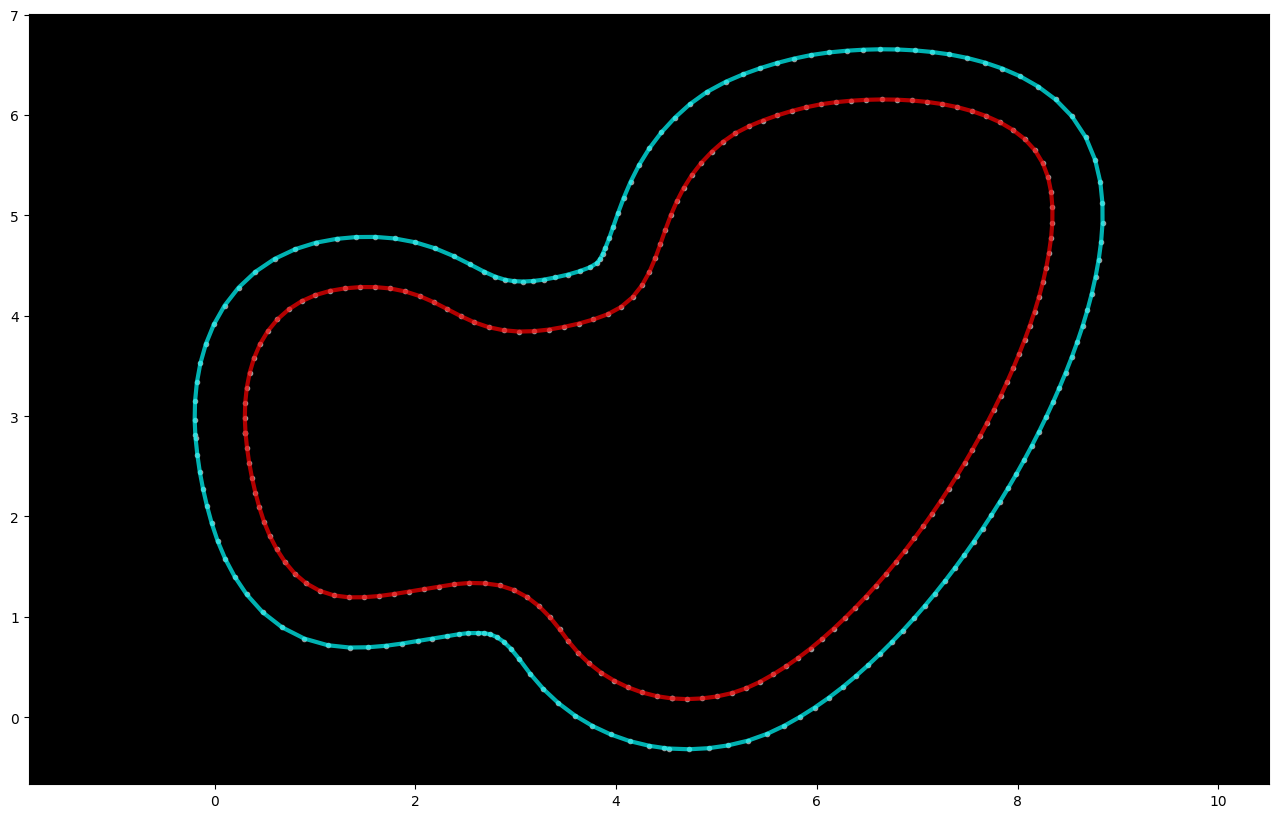

In [107]:
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
np_outer_points = np.asarray(new_outer_points)
print_border(ax, center_line, [], np_outer_points)